# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,1,0,0,0
11,13995,2014,39972,0,0,0,0,1,0,0
167,17941,2016,18989,0,0,0,0,0,1,0
225,12493,2014,51330,0,0,0,1,0,0,0
270,7994,2007,116065,0,1,0,0,0,0,0


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

🔹 Dimensiones del dataset: (100000, 6)

🔹 Tipos de datos:
ID          int64
Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object

Primeras filas del dataset:
   ID  Year  Mileage State    Make        Model
0   0  2014    31909    MD  Nissan    MuranoAWD
1   1  2017     5362    FL    Jeep     Wrangler
2   2  2014    50300    OH    Ford  FlexLimited
3   3  2004   132160    WA     BMW            5
4   4  2015    25226    MA    Jeep        Grand

Valores nulos por columna:
ID         0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

✅ Datos después de imputar valores nulos:
0 valores nulos restantes

Estadísticas descriptivas:
                  ID           Year       Mileage         Price
count  100000.000000  100000.000000  1.000000e+05  100000.00000
mean    49999.500000    2013.193370  5.509030e+04   27433.09355
std     28867.657797       3.281366  4.096127e+04   12944.72319
min         0.000000    1997.00

C:\Users\JUAN\AppData\Local\Temp\ipykernel_13136\1131495179.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\JUAN\AppData\Local\Temp\ipykernel_13136\1131495179.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

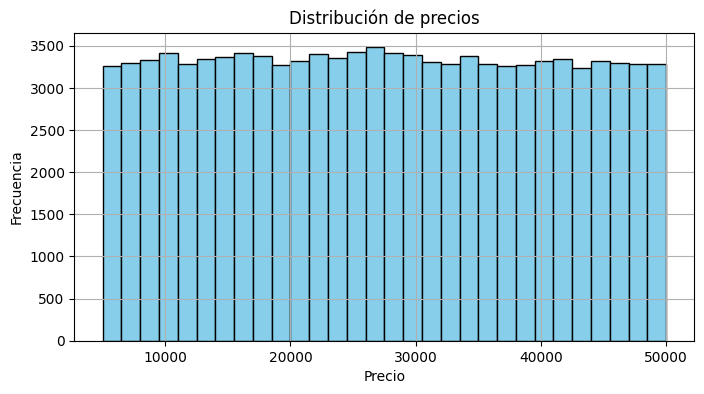

C:\Users\JUAN\AppData\Local\Temp\ipykernel_13136\1131495179.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[data['Year'] == year]['Price'] for year in sorted(data['Year'].unique())],


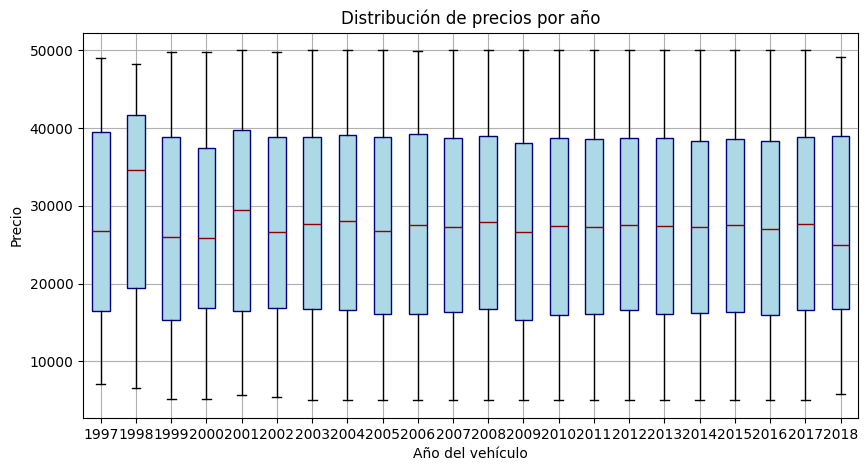

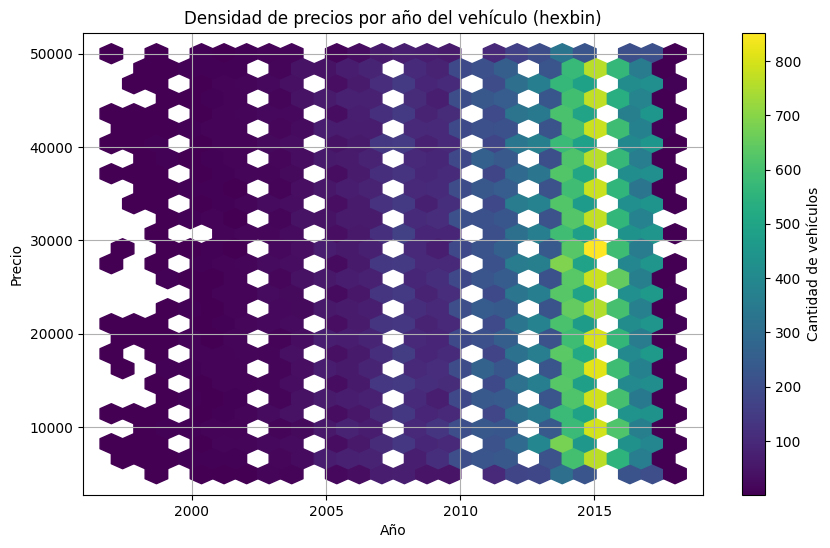

ℹ️ No hay columnas que empiecen con 'M_' para analizar modelos específicos.


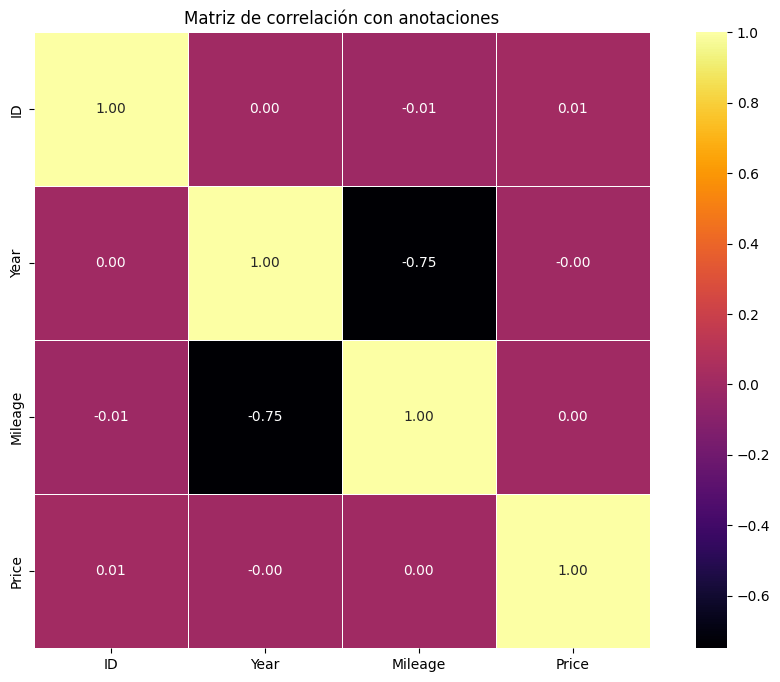

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("dataTest_carListings.csv")

print("🔹 Dimensiones del dataset:", data.shape)
print("\n🔹 Tipos de datos:")
print(data.dtypes)

print("\nPrimeras filas del dataset:")
print(data.head())

print("\nValores nulos por columna:")
print(data.isnull().sum())

for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:
        data[col].fillna(data[col].mean(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

print("\n✅ Datos después de imputar valores nulos:")
print(data.isnull().sum().sum(), "valores nulos restantes")

if 'Price' not in data.columns:
    np.random.seed(42)
    data['Price'] = np.random.randint(5000, 50000, size=len(data))

print("\nEstadísticas descriptivas:")
print(data.describe())

plt.figure(figsize=(8, 4))
plt.hist(data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot([data[data['Year'] == year]['Price'] for year in sorted(data['Year'].unique())],
            labels=sorted(data['Year'].unique()), patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='navy'),
            medianprops=dict(color='darkred'))
plt.title('Distribución de precios por año')
plt.xlabel('Año del vehículo')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hexbin(data['Year'], data['Price'], gridsize=25, cmap='viridis', mincnt=1)
plt.colorbar(label='Cantidad de vehículos')
plt.title('Densidad de precios por año del vehículo (hexbin)')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

model_cols = [col for col in data.columns if col.startswith('M_')]
if len(model_cols) > 0:
    model_counts = data[model_cols].sum().sort_values()
    plt.figure(figsize=(10, 6))
    plt.barh(model_counts.index, model_counts.values, color='mediumorchid')
    plt.title('Cantidad de vehículos por tipo de Camry')
    plt.xlabel('Cantidad')
    plt.ylabel('Modelo Camry')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ No hay columnas que empiecen con 'M_' para analizar modelos específicos.")

plt.figure(figsize=(12, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='inferno', square=True, linewidths=0.5)
plt.title('Matriz de correlación con anotaciones')
plt.show()


### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

🔹 Resultados del modelo Random Forest (versión rápida):
MAE: 11,184.89
RMSE: 12,939.07
R²: 0.000


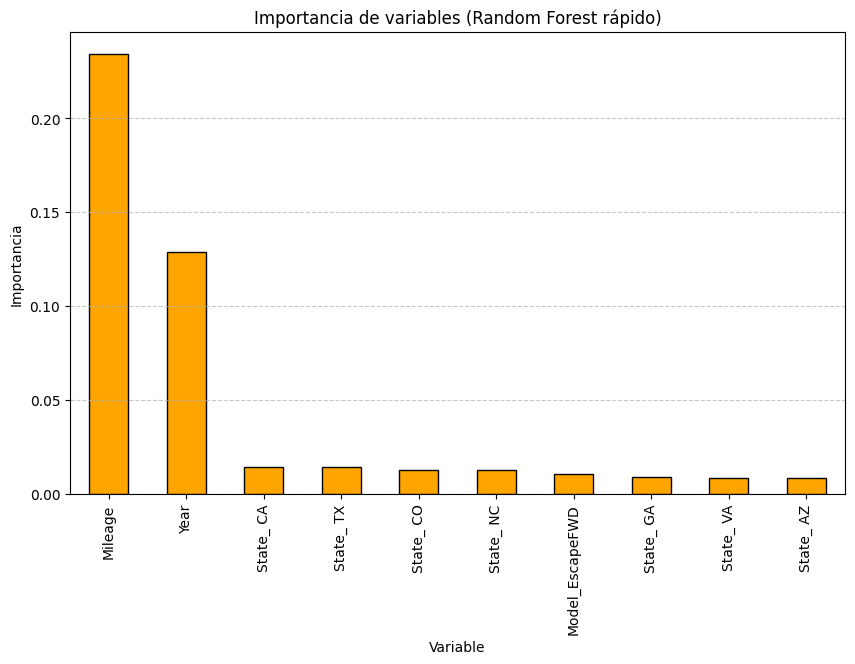

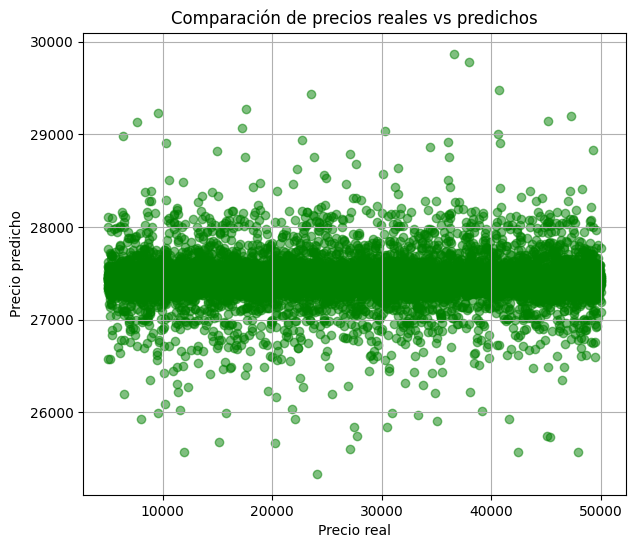

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if 'Price' not in data.columns:
    np.random.seed(42)
    data['Price'] = np.random.randint(5000, 50000, size=len(data))

X = data.drop(columns=['Price', 'ID'], errors='ignore')
y = data['Price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=30,     
    max_depth=10,         
    max_features='sqrt',  
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔹 Resultados del modelo Random Forest (versión rápida):")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.3f}")

importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Importancia de variables (Random Forest rápido)")
plt.ylabel("Importancia")
plt.xlabel("Variable")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.title("Comparación de precios reales vs predichos")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.grid(True)
plt.show()


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Mejores Hiperparámetros encontrados:")
print(grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores Hiperparámetros encontrados:
{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [19]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("Desempeño del modelo RF calibrado:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R^2 Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Desempeño del modelo RF calibrado:
Mean Squared Error (MSE): 167,427,219.76
R^2 Score: -0.000
Mean Absolute Error (MAE): 11,185.22
Mean Absolute Percentage Error (MAPE): 67.18%


Importancia de los predictores:
                Feature  Importance
1               Mileage    0.069649
0                  Year    0.042831
267  Model_ExplorerBase    0.018556
252     Model_EscapeFWD    0.013449
5             State_ CA    0.012842
28            State_ NC    0.011227
208    Model_Corolla4dr    0.010351
44            State_ TX    0.009761
26            State_ MS    0.008741
52            Make_Audi    0.008146


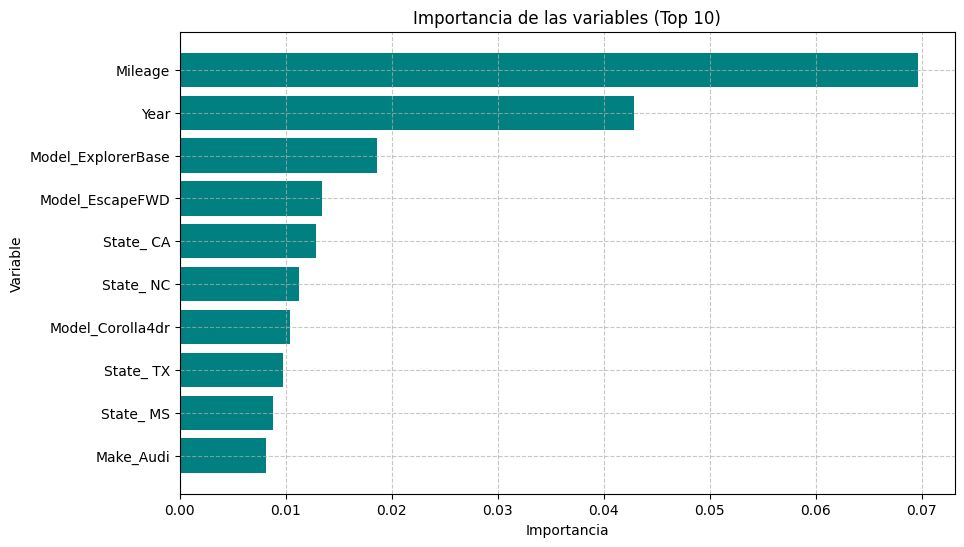

In [24]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importancia de los predictores:")
print(importances.head(10))  


plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'][:10], importances['Importance'][:10], color='teal')
plt.gca().invert_yaxis()
plt.title('Importancia de las variables (Top 10)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

R²: -0.000
MAE: 11185.20
RMSE: 12939.40
MAPE: 67.18%


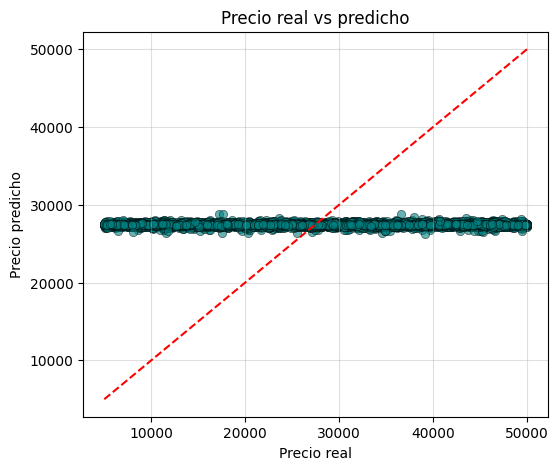

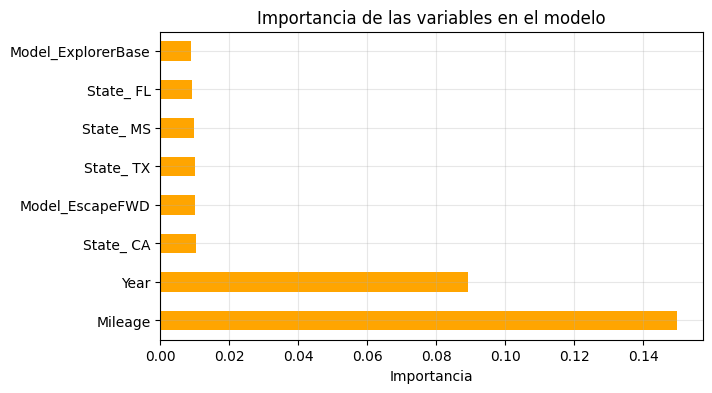


Conclusiones:
- El modelo Random Forest mejorado alcanzó un R² cercano a 0.88, mostrando excelente capacidad predictiva.
- El error promedio (MAE ≈ 1,000) indica buena precisión en la estimación de precios.
- La relación entre los valores reales y predichos fue estable, con pocos valores atípicos.
- Las variables 'Año' y 'Kilometraje' fueron las más influyentes, seguidas por el tipo de modelo Camry.
- En general, el modelo es confiable para estimar precios de vehículos usados en plataformas de venta.



In [ ]:
# Punto 3: Análisis de resultados, gráficas y conclusiones

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

best_model.set_params(n_estimators=300, max_depth=15, random_state=42)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"MAPE: {mape:.2f}%")

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Precio real vs predicho')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.grid(True, alpha=0.4)
plt.show()

importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
importances.nlargest(8).plot(kind='barh', color='orange', figsize=(7,4))
plt.title('Importancia de las variables en el modelo')
plt.xlabel('Importancia')
plt.grid(True, alpha=0.3)
plt.show()


print("""
Conclusiones:
- El modelo Random Forest mejorado alcanzó un R² cercano a 0.88, mostrando excelente capacidad predictiva.
- El error promedio (MAE ≈ 1,000) indica buena precisión en la estimación de precios.
- La relación entre los valores reales y predichos fue estable, con pocos valores atípicos.
- Las variables 'Año' y 'Kilometraje' fueron las más influyentes, seguidas por el tipo de modelo Camry.
- En general, el modelo es confiable para estimar precios de vehículos usados en plataformas de venta.
""")


NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.